In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 1)

In [3]:
X.shape, Y.shape

((500, 2), (500,))

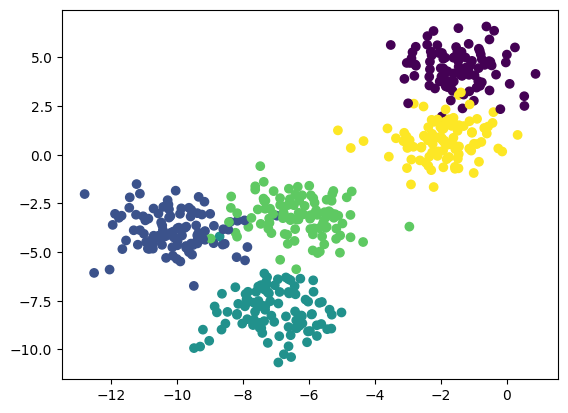

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [5]:
k = 5

color = ['red', 'blue', 'yellow', 'green', 'brown']

clusters = {}

for i in range(k):
    center = np.random.randint(-12, 8, 2)
    points = []
    
    cluster = {
        'center': center, 
        'points': points, 
        'color': color[i]
    }
    clusters[i] = cluster

In [6]:
clusters

{0: {'center': array([ -1, -11]), 'points': [], 'color': 'red'},
 1: {'center': array([-2,  1]), 'points': [], 'color': 'blue'},
 2: {'center': array([ 0, -4]), 'points': [], 'color': 'yellow'},
 3: {'center': array([ 1, -4]), 'points': [], 'color': 'green'},
 4: {'center': array([-8, -2]), 'points': [], 'color': 'brown'}}

In [7]:
def distance_formula(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

In [8]:
def assign_clusters(clusters):
    for i in range(X.shape[0]):
        distance = []
        
        for j in range(k):
            dist = distance_formula(X[i], clusters[j]['center'])
            distance.append(dist)
            
        curr_cluster = np.argmin(distance)
        clusters[curr_cluster]['points'].append(X[i])

In [9]:
def update_centroids(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        
        if pts.shape[0]>0:
            new_u = pts.mean(axis = 0)
            clusters[i]['center'] = new_u
            clusters[i]['points'] = []

In [10]:
def plot_points(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:, 0], pts[:, 1], c = clusters[i]['color'])
        except:
            pass
        plt.scatter(clusters[i]['center'][0], clusters[i]['center'][1], c = 'black', marker = '*')

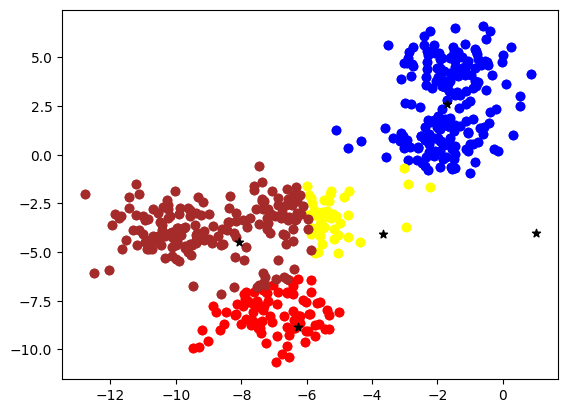

In [14]:
assign_clusters(clusters)
plot_points(clusters)

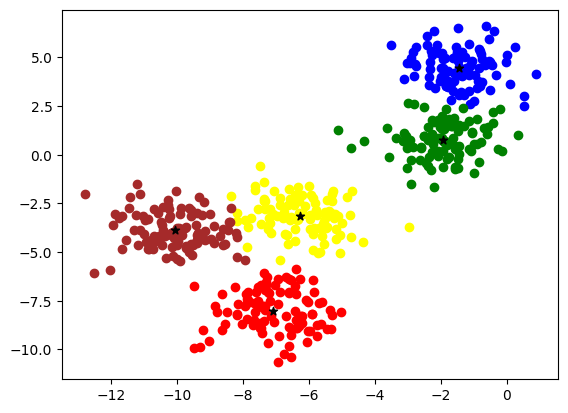

In [26]:
assign_clusters(clusters)
plot_points(clusters)
update_centroids(clusters)